In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 300})

In [1]:
# Working code that finds the pixel scaling in arc seconds per pixel
# and converts pixel distances to arc seconds

# First used for SDSSJ1330 (which has the same proposal ID as RXJ0911)

import astropy.io.fits as fits

def get_pixel_scale(fits_file_path):
    """
    Extract the pixel scale from a FITS file and convert it to arcseconds per pixel.

    Parameters:
    fits_file_path (str): The path to the FITS file.

    Returns:
    float: Pixel scale in arcseconds per pixel, or None if not determinable.
    """
    try:
        # Open the FITS file
        with fits.open(fits_file_path) as hdul:
            header = hdul[0].header

            # Check for CD1_1 and CD2_2 keywords first
            if 'CD1_1' in header and 'CD2_2' in header:
                pixel_scale_x = abs(header['CD1_1']) * 3600  # convert from degrees to arcseconds
                pixel_scale_y = abs(header['CD2_2']) * 3600  # convert from degrees to arcseconds
            # If not available, check for CDELT1 and CDELT2
            elif 'CDELT1' in header and 'CDELT2' in header:
                pixel_scale_x = abs(header['CDELT1']) * 3600
                pixel_scale_y = abs(header['CDELT2']) * 3600
            else:
                return None  # Pixel scale not found
                print("Pixel scale not found in FITS header.")

            # Return the average of the pixel scales if both axes are present
            return (pixel_scale_x + pixel_scale_y) / 2.0
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def pixels_to_arcseconds(num_pixels, pixel_scale):
    """
    Convert a number of pixels to arc seconds using the pixel scale.

    Parameters:
    num_pixels (float): Number of pixels to convert.
    pixel_scale (float): Pixel scale in arcseconds per pixel.

    Returns:
    float: Distance in arc seconds.
    """
    return num_pixels * pixel_scale

# Example usage
fits_file_path = "/Users/ainsleylewis/Documents/Astronomy/HPC/Lensing/Simulations/Input/Neirenberg/WGDJ0405_cropped.fits"
pixel_scale = get_pixel_scale(fits_file_path)

if pixel_scale:
    print(f"Pixel scale: {pixel_scale:.4f} arcseconds/pixel")
    
    # Manual input for number of pixels [For WGD2038: (From model:24.144 => 0.5131 arc seconds) (From image/eye: 11.505257 => 0.2445 arc seconds)]
    num_pixels = 7.145  # Change this value to whatever number of pixels you want to convert
    arcseconds = pixels_to_arcseconds(num_pixels, pixel_scale)
    print(f"{num_pixels} pixels = {arcseconds:.4f} arc seconds")
    
else:
    print("Pixel scale could not be determined from the FITS file.")

Pixel scale: 0.0938 arcseconds/pixel
7.145 pixels = 0.6702 arc seconds


In [3]:
columns = ['x', 'y', 'mag', 'pos_err', 'flux_err', 'other1', 'other2', 'other3']
obs_point = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/HPC/Lensing/Simulations/Input/Neirenberg/Eobs_point.dat', delim_whitespace=True, header=None, names=columns, skiprows=1)
obs_point

,x,y,mag,pos_err,flux_err,other1,other2,other3
0,0.708,-0.244,0.0,0.005,0.0,0.0,0.0,0.0
1,-0.358,-0.567,0.0,0.005,0.0,0.0,0.0,0.0
2,0.363,0.592,0.0,0.005,0.0,0.0,0.0,0.0
3,-0.515,0.454,0.0,0.005,0.0,0.0,0.0,0.0


In [19]:
obs_point['Img'] = ['A', 'C', 'B', 'D']
obs_point

,x,y,mag,pos_err,flux_err,other1,other2,other3,Img
0,0.708,-0.244,0.0,0.005,0.0,0.0,0.0,0.0,A
1,-0.358,-0.567,0.0,0.005,0.0,0.0,0.0,0.0,C
2,0.363,0.592,0.0,0.005,0.0,0.0,0.0,0.0,B
3,-0.515,0.454,0.0,0.005,0.0,0.0,0.0,0.0,D


In [23]:
X = 83.2914
Y = 60.5376

x_image_1 = 84
y_image_1 = 66.0013
x_image_2 = 78.0287
y_image_2 = 61.0143
x_image_3 = 81.9879
y_image_3 = 54.9781
x_image_4 = 88.9977
y_image_4 = 58.0287

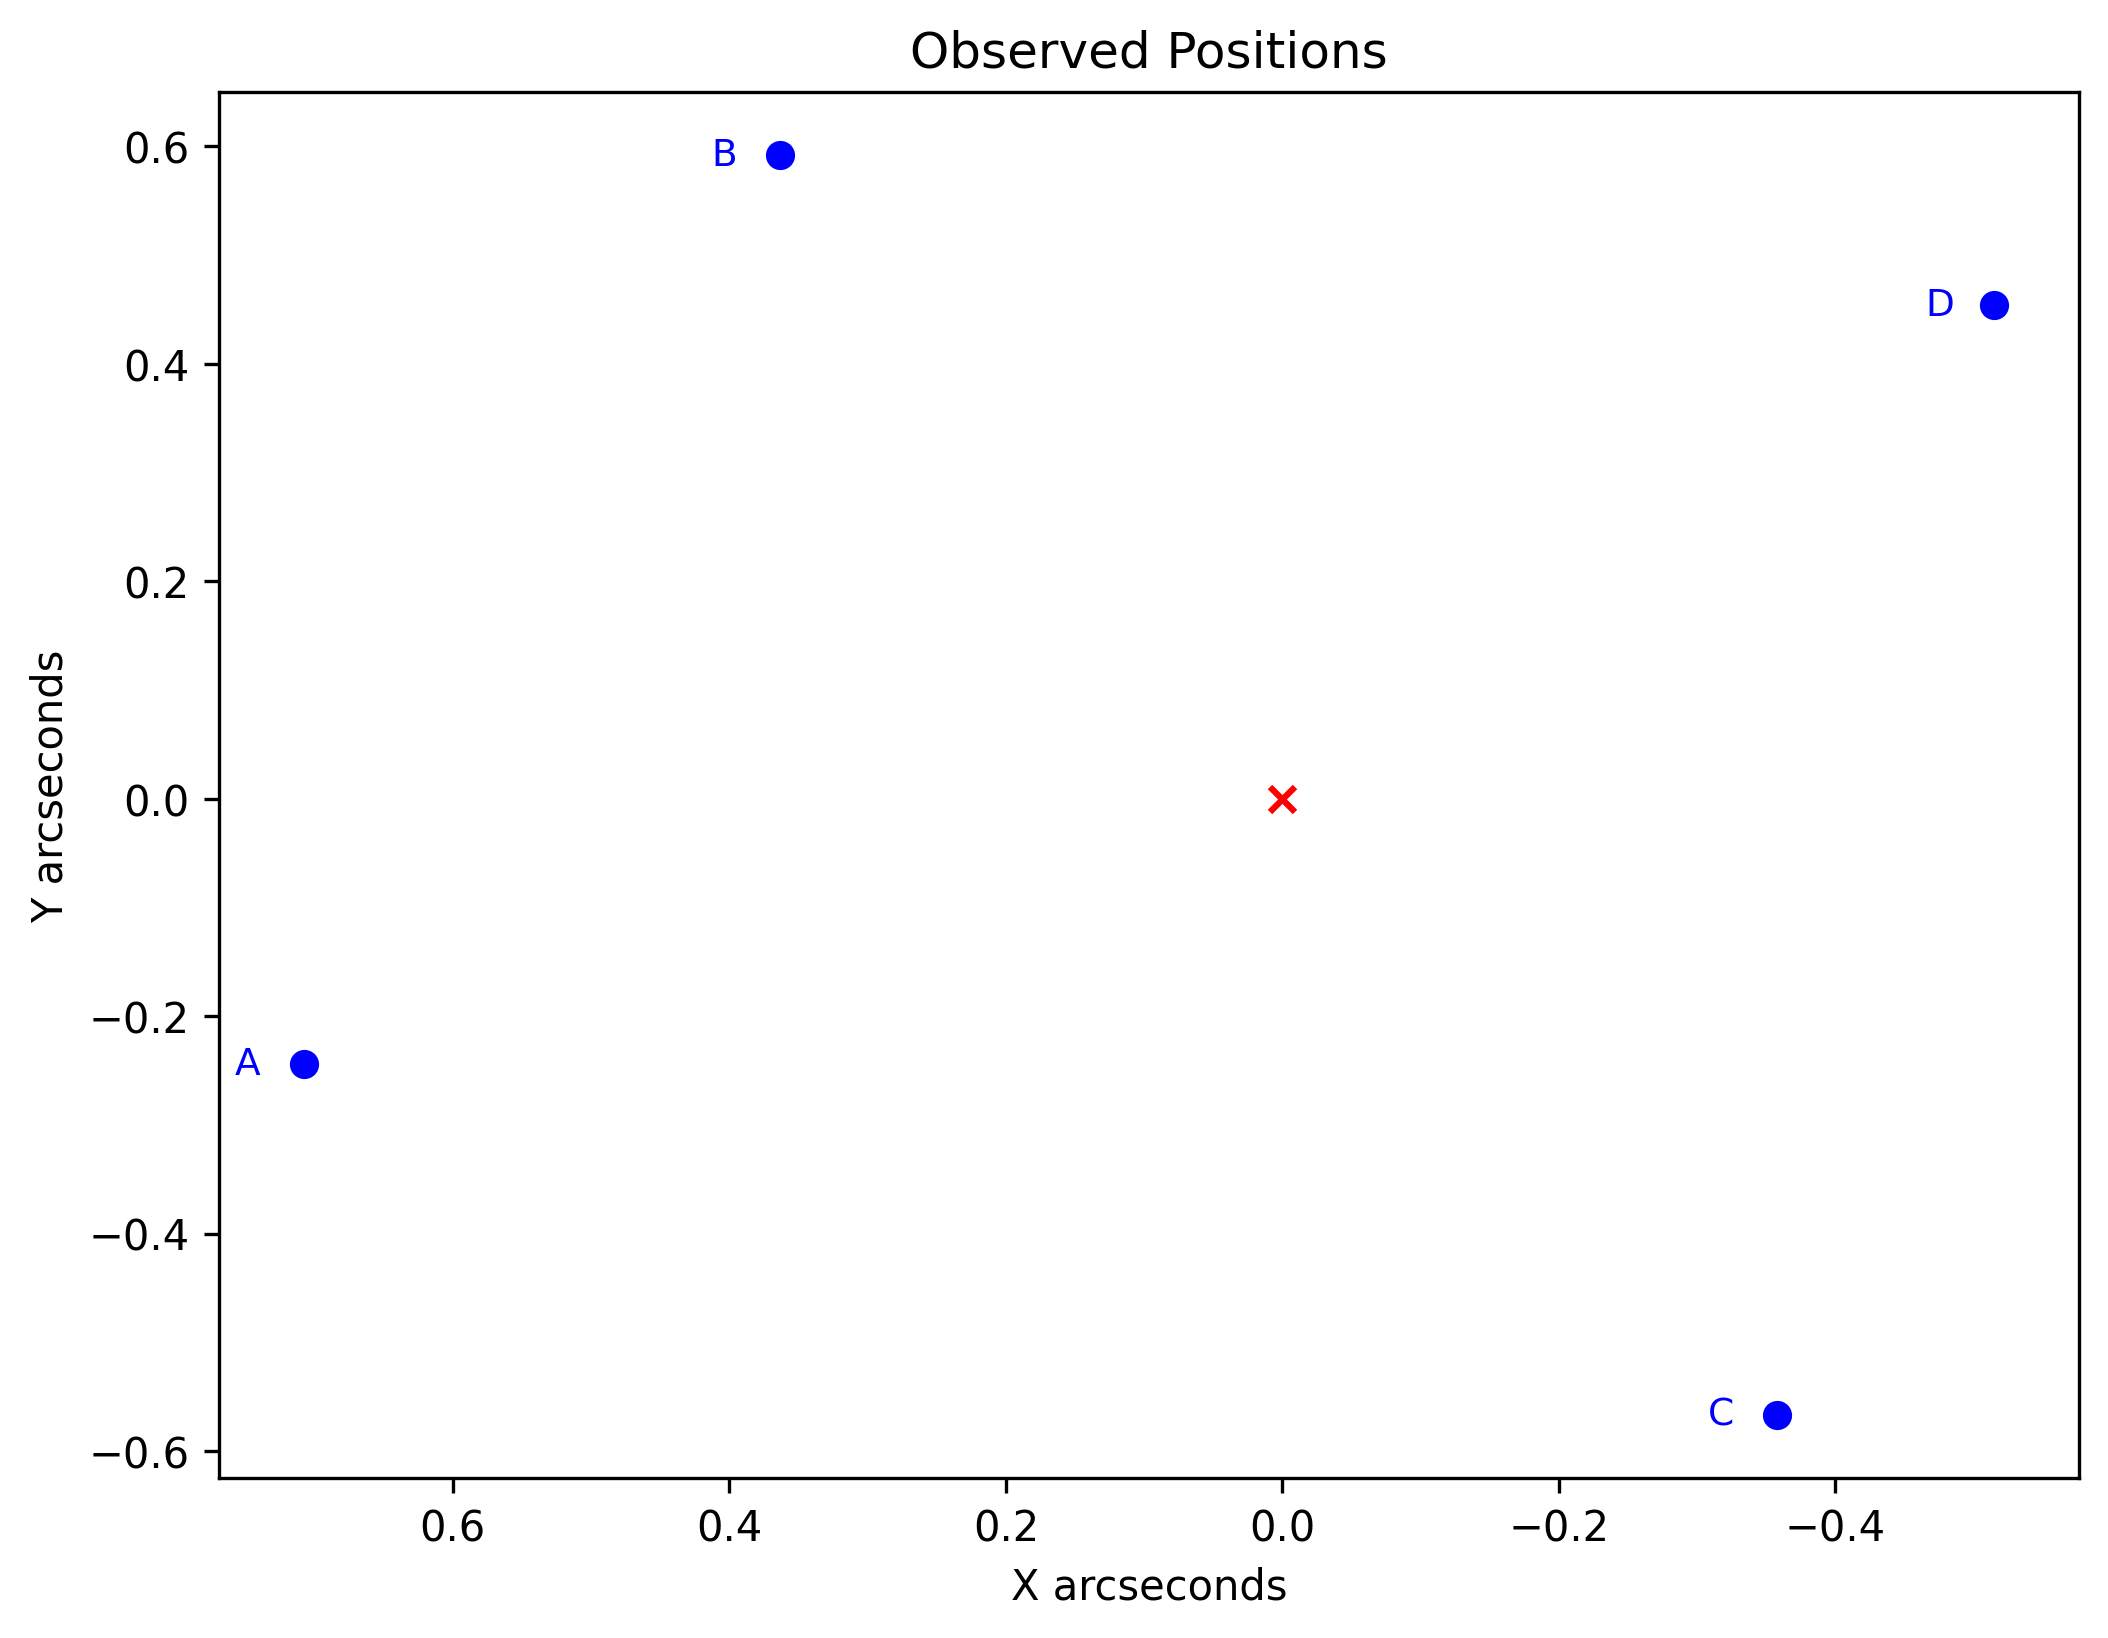

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(obs_point['x'], obs_point['y'], color='blue', marker='o', label='Observed Positions')
for _, row in obs_point.iterrows():
    plt.text(row['x'] + 0.05, row['y'], row['Img'], color='blue', va='center', fontsize=9)
plt.scatter(0, 0, color='red', marker='x', label='Sersic Position')
plt.xlabel('X arcseconds')
plt.ylabel('Y arcseconds')
plt.title('Observed Positions')
plt.gca().invert_xaxis()
plt.show()

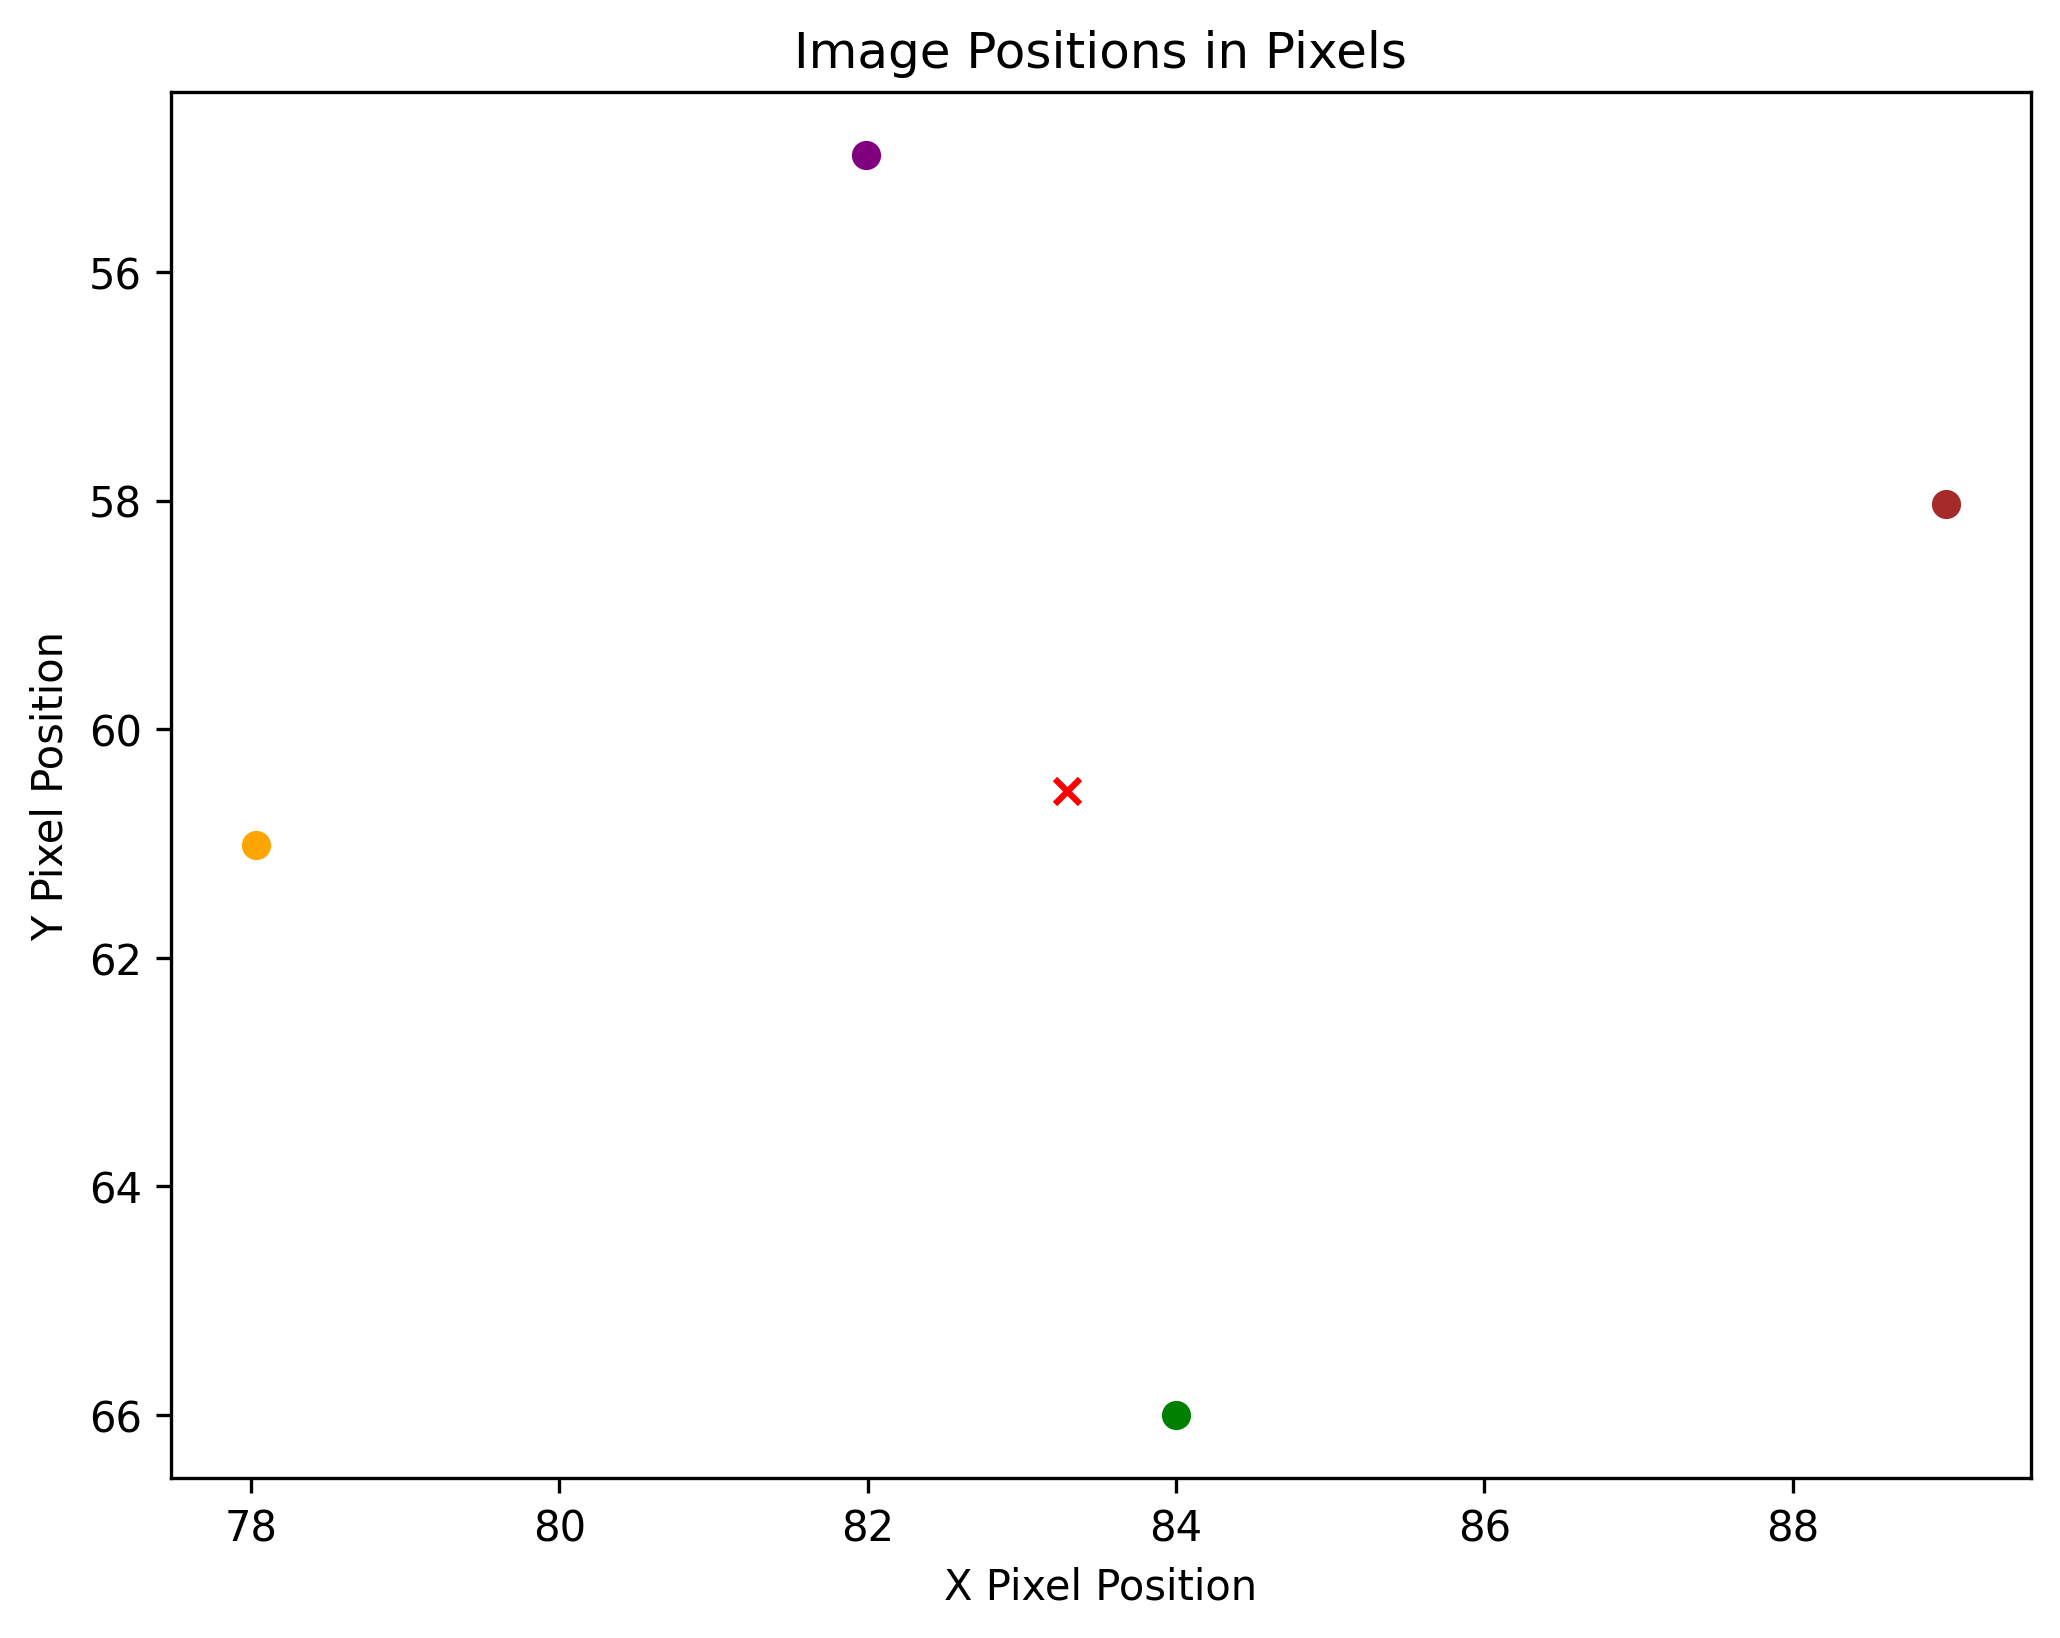

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(x_image_1, y_image_1, color='green', marker='o', label='Image 1')
plt.scatter(x_image_2, y_image_2, color='orange', marker='o', label='Image 2')
plt.scatter(x_image_3, y_image_3, color='purple', marker='o', label='Image 3')
plt.scatter(x_image_4, y_image_4, color='brown', marker='o', label='Image 4')
plt.scatter(X, Y, color='red', marker='x', label='Sersic Position')
plt.xlabel('X Pixel Position')
plt.ylabel('Y Pixel Position')
plt.title('Image Positions in Pixels')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
x_converion = obs_point['x'][]/x_image_1